#**Data Preparation**

###**Load Data**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


df=pd.read_csv("new_fused_dataset.csv")
df.head()

,suicides/100k pop,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Income composition of resources,Schooling,HDI for year,gdp_per_capita ($)
0,8.27,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695
1,5.38,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695
2,5.01,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695
3,3.94,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695
4,3.58,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695


### **One-hot encoding for 'status' column**


*   Status_developing = 1 (developing)
*   Status_developing = 0 (developed)



In [22]:
df = pd.get_dummies(df, columns=['Status'], drop_first=True, dtype=int)
#check the first 10 rows
print(df.head(10))

   suicides/100k pop  Life expectancy  Adult Mortality  infant deaths  \
0               8.27             76.2               91              1   
1               5.38             76.2               91              1   
2               5.01             76.2               91              1   
3               3.94             76.2               91              1   
4               3.58             76.2               91              1   
5               3.27             76.2               91              1   
6               3.10             76.2               91              1   
7               3.04             76.2               91              1   
8               2.90             76.2               91              1   
9               2.28             76.2               91              1   

   Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0     5.28               41.822757           99       10  54.3   
1     5.28               41.822757           99       10  54.3  

### **Drop suicide-related variables**


*   Column 'suicides/100k pop' was removed to prevent any data leakage and bias



In [23]:
df_cluster = df.drop(
    columns=["suicides/100k pop"],
    errors="ignore"
)

df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15264 entries, 0 to 15263
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  15264 non-null  float64
 1   Adult Mortality                  15264 non-null  int64  
 2   infant deaths                    15264 non-null  int64  
 3   Alcohol                          15264 non-null  float64
 4   percentage expenditure           15264 non-null  float64
 5   Hepatitis B                      15264 non-null  int64  
 6   Measles                          15264 non-null  int64  
 7   BMI                              15264 non-null  float64
 8   under-five deaths                15264 non-null  int64  
 9   Polio                            15264 non-null  int64  
 10  Total expenditure                15264 non-null  float64
 11  Diphtheria                       15264 non-null  int64  
 12  HIV/AIDS          

### **Scaling**


*   Z-score standardisation was applied to all features



In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

#**Experiment**
From this graph we cut at the higher level

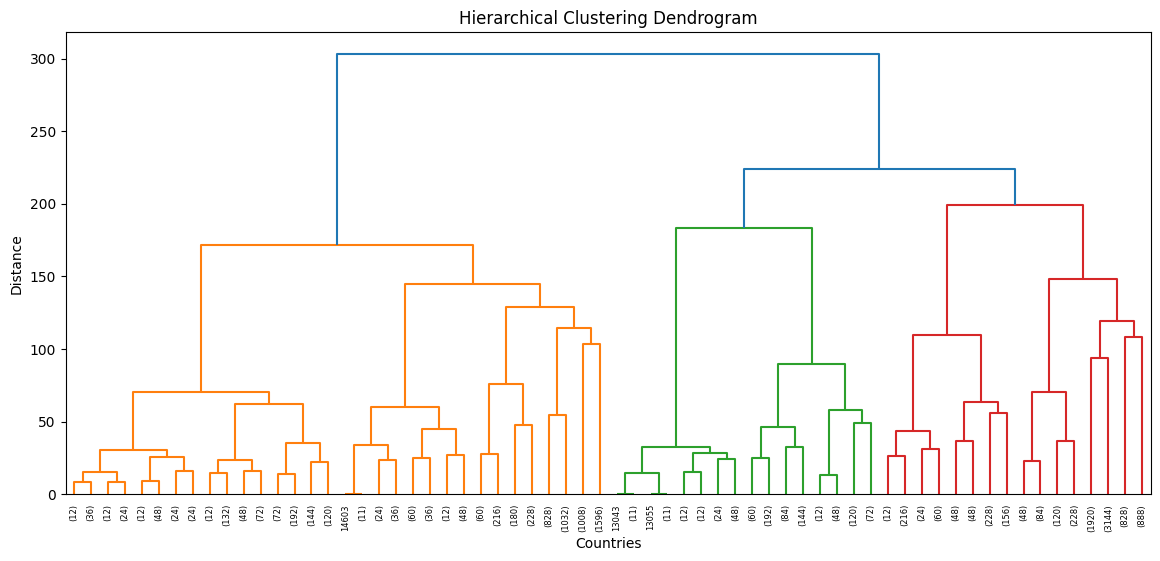

In [25]:
#Generate linkage matrix (Ward method)
linkage_matrix = linkage(X_scaled, method="ward")

#Plot dendrogram
plt.figure(figsize=(14,6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

**Cut dendrogram at higher levels**

In [48]:
#Higher-level clusters
clusters_high = fcluster(linkage_matrix, t=200, criterion="distance") # broad, high level cluster

**Attach hierarchical clusters**

In [49]:
df["Cluster_High"] = clusters_high

**Silhouette & DBI for Hierarchical**

In [50]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_hier = silhouette_score(X_scaled, clusters_high)
dbi_hier = davies_bouldin_score(X_scaled, clusters_high)

print("Hierarchical Silhouette:", sil_hier)
print("Hierarchical Davies-Bouldin:", dbi_hier)

Hierarchical Silhouette: 0.17174336466710838
Hierarchical Davies-Bouldin: 1.8428452521718721


**Interpratation**

We cut on the highest level (broad level), hence we come out with 3 cluster

In [51]:
cluster_profile = df.groupby("Cluster_High")[['Life expectancy', 'GDP', 'Schooling', 'suicides/100k pop']].mean()
cluster_profile

,Life expectancy,GDP,Schooling,suicides/100k pop
Cluster_High,,,,
1,78.973396,22528.670948,15.498302,14.242550
2,69.297183,4477.820565,12.825352,4.083685
3,73.586140,5191.246167,13.164829,11.478920
